In [77]:
using LightGraphs
using PyPlot: spy
using StatsBase: fit, Histogram

In [78]:
function connected_erdos_renyi(N, p)
    
    is_connected_flag = false
    A = zeros(N, N);
    
    while !is_connected_flag
        for i = 2:N
            A[i, 1:i-1] = rand(i-1) .< p;
        end

        A += A';
        
        # Ensure connectivity.
        
        # Degree matrix.
        D = diagm(vec(sum(A, 1)));
        # Laplacian matrix.
        L = D - A;
        
        F = eigfact(L);
        λ = F[:values];
        
        connected = λ[2] > 1e-6;
        if connected
            is_connected_flag = true;
        else
            A = zeros(N, N);
        end
    end
    
    return A;
end

connected_erdos_renyi (generic function with 1 method)

In [79]:
N = 100
p = 0.2;
A = connected_erdos_renyi(N, p);

F = eigfact(A);
V = F[:vectors];
λ = F[:values];
println("Second smallest eigenvalue: ", sort(λ)[2], '.')

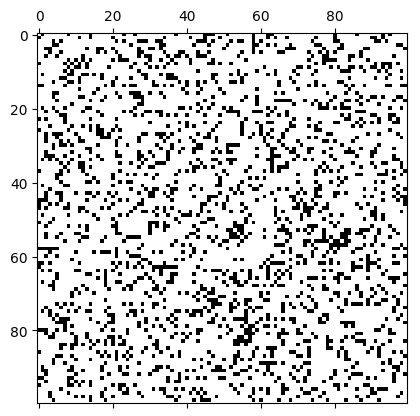

PyObject <matplotlib.image.AxesImage object at 0x7fe5b27042d0>

Second smallest eigenvalue: -7.584795608750838.


In [80]:
spy(A)

In [81]:
# Orthogonality sanity-check.
assert(sum(inv(V) - V')/prod(size(V)) < 1e-6)

In [82]:
U = V';

In [83]:
# Build random unitary matrix.
idxs = rand(1:N, N);
Utilde = U[idxs, :];

# Compute expected value.
E_Utilde = zeros(N, N);
for i = 1:N
    E_Utilde += Utilde[i,:]*Utilde[i,:]';
end

E_Utilde

100×100 Array{Float64,2}:
  1.19034       0.107613    -0.0725515   …   0.0712789    0.0462101 
  0.107613      1.07898      0.00485875      0.024738     0.0848555 
 -0.0725515     0.00485875   1.13356        -0.0252202   -0.0137589 
  0.0997914     0.0780972   -0.0835692       0.0963595    0.0942552 
 -0.0606682     0.0731983    0.0295642       0.0582236    0.0728213 
  0.00984144    0.169783    -0.110665    …  -0.0703651   -0.136494  
 -0.0719265    -0.114734     0.211431       -0.0194887    0.00944042
  0.0932307     0.0560324   -0.0832677      -0.0646206    0.0263819 
  0.0303694    -0.115251    -0.0735629      -0.0323981    0.0810068 
  0.00144668   -0.145379     0.123033       -0.209982    -0.0754171 
 -0.0472823     0.00111687   0.0710048   …   0.138846    -0.0746518 
 -0.124268     -0.153435    -0.0884417      -0.0743292    0.1333    
 -0.00872985    0.0418684    0.105875        0.201224    -0.00949629
  ⋮                                      ⋱                          
  0.0859

In [84]:
# Compute expected value.
E_U = zeros(N, N);
for i = 1:N
    E_U += U[i,:]*U[i,:]';
end

E_U

100×100 Array{Float64,2}:
  1.0          -3.98986e-16  -3.94303e-15  …   4.65687e-15  -1.75034e-15
 -3.98986e-16   1.0           1.59248e-15     -1.36436e-15  -1.73125e-15
 -3.94303e-15   1.59248e-15   1.0             -4.28477e-16   1.13451e-15
  1.83707e-15  -2.57693e-15  -7.14706e-16     -1.70523e-15  -1.10936e-15
  1.81886e-15  -5.13478e-16   1.22818e-15     -8.30933e-16   1.45543e-15
  3.46424e-15  -2.05912e-15   7.14706e-16  …  -7.1991e-16    6.66134e-16
 -1.00614e-16   1.11196e-15   9.1073e-16      -1.9082e-15    4.96651e-15
 -1.9082e-15    8.67362e-16   6.38899e-15      4.43569e-15   2.1684e-15 
 -2.79724e-15  -1.43982e-15  -4.09568e-15      3.71578e-15  -8.67362e-17
 -1.64452e-15   1.68789e-15   1.18655e-15     -1.22298e-15   1.27849e-15
  3.30812e-15   4.329e-15    -1.78677e-16  …  -6.33174e-16  -1.9186e-15 
 -1.31319e-15   1.35655e-15   1.249e-16       -4.02456e-16  -1.3687e-15 
  2.33234e-15  -2.94036e-16   9.22873e-16     -6.7394e-16    2.00274e-15
  ⋮                      

In [85]:
#h = fit(Histogram, U[:])
println(mean(Utilde[:]), ' ', var(Utilde[:]))
println(mean(U[:]), ' ', var(U[:]))

-0.0007954446920323369 0.010000367304472364
-0.0011576627272500196 0.009999659782988234
